In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("netflix.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# Renaming the listed in columns to genres

df.rename(columns={'listed_in':'genre'},inplace=True)
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genre', 'description'],
      dtype='object')

In [ ]:
# Dropping the show_id columns as it may be of no use

df.drop(columns='show_id',inplace=True)

In [ ]:
# Checking for duplicates

df.duplicated().sum() #For identical rows

np.int64(0)

In [ ]:
# Checking for missing values

df.isna().sum()

,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3
genre,0


In [ ]:
# Dropping the rows which have null values

df.dropna(subset=["date_added"],inplace=True)
df["date_added"].isna().sum()

np.int64(0)

In [ ]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

np.int64(0)

In [ ]:
df.dropna(subset=["duration"],inplace=True)
df["duration"].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
type,0
title,0
director,2621
cast,825
country,829
date_added,0
release_year,0
rating,0
duration,0
genre,0


In [ ]:
df['date_added']=pd.to_datetime(df['date_added'],errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8790 non-null   object        
 1   title         8790 non-null   object        
 2   director      6169 non-null   object        
 3   cast          7965 non-null   object        
 4   country       7961 non-null   object        
 5   date_added    8702 non-null   datetime64[ns]
 6   release_year  8790 non-null   int64         
 7   rating        8790 non-null   object        
 8   duration      8790 non-null   object        
 9   genre         8790 non-null   object        
 10  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 824.1+ KB


In [ ]:
df["date_added"].isnull().sum()

np.int64(88)

In [ ]:
df.dropna(subset=["date_added"],inplace=True)
df["date_added"].isna().sum()

np.int64(0)

In [ ]:
# Splitting date_added column into day , month , year ,month_name , weekday.
df['day']=df['date_added'].dt.day
df['month']=df["date_added"].dt.month
df['year']=df["date_added"].dt.year
df['month_name']=df["date_added"].dt.month_name()
df['weekday']=df["date_added"].dt.day_name()
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [ ]:
df['rating'] = df['rating'].replace(['TV-Y','TV-Y7','G','TV-G','PG','TV-PG','TV-Y7-FV'],'Kids')
df['rating'] = df['rating'].replace(['PG-13','TV-14'],'Teens')
df['rating'] = df['rating'].replace(['R','TV-MA','NC-17'],'Adults')
df['rating'] = df['rating'].replace(['NR','UR'],np.nan)
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description,day,month,year,month_name,weekday
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,Adults,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,24,9,2021,September,Friday
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,Adults,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",24,9,2021,September,Friday
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,24,9,2021,September,Friday


In [ ]:
df["rating"].isna().sum()

np.int64(81)

In [ ]:
df.dropna(subset=["rating"],inplace=True)
df["rating"].isna().sum()

np.int64(0)

In [ ]:
df.isna().sum()

,0
type,0
title,0
director,2535
cast,800
country,826
date_added,0
release_year,0
rating,0
duration,0
genre,0


In [ ]:
df[(df['director'].isna()) & (df['country'].isna()) & (df['cast'].isna())].shape[0]

96

In [ ]:
df.shape

(8621, 16)

In [ ]:
df.dropna(subset = ['director','country','cast'],how='all',inplace=True)
df.shape

(8525, 16)

In [ ]:
df_cast = pd.DataFrame(df['cast'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_cast = df_cast.stack()
df_cast = pd.DataFrame(df_cast)
df_cast.reset_index(inplace=True)
df_cast = df_cast[['title',0]]
df_cast.columns = ['title','cast']
df_cast.replace('nan',np.nan,inplace=True)
df_cast.isna().sum()

,0
title,0
cast,704


In [ ]:
df_country = pd.DataFrame(df['country'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_country = df_country.stack()
df_country = pd.DataFrame(df_country)
df_country.reset_index(inplace=True)
df_country = df_country[['title',0]]
df_country.columns = ['title','country']
df_country.replace('nan',np.nan,inplace=True)
df_country.isna().sum()

,0
title,0
country,730


In [ ]:
df_director = pd.DataFrame(df['director'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_director = df_director.stack()
df_director = pd.DataFrame(df_director)
df_director.reset_index(inplace=True)
df_director = df_director[['title',0]]
df_director.columns = ['title','director']
df_director.replace('nan',np.nan,inplace=True)
df_director.isna().sum()

,0
title,0
director,2439


In [ ]:
df_genre = pd.DataFrame(df['genre'].apply(lambda x: str(x).split(', ')).tolist(),index=df['title'])
df_genre = df_genre.stack()
df_genre = pd.DataFrame(df_genre)
df_genre.reset_index(inplace=True)
df_genre = df_genre[['title',0]]
df_genre.columns = ['title','genre']
df_genre.replace('nan',np.nan,inplace=True)
df_genre.isna().sum()

,0
title,0
genre,0


In [ ]:
df2=df_cast.merge(df_genre,on = 'title')
df2

,title,cast,genre
0,Dick Johnson Is Dead,NaN,Documentaries
1,Blood & Water,Ama Qamata,International TV Shows
2,Blood & Water,Ama Qamata,TV Dramas
3,Blood & Water,Ama Qamata,TV Mysteries
4,Blood & Water,Khosi Ngema,International TV Shows
...,...,...,...
146662,Zubaan,Anita Shabdish,International Movies
146663,Zubaan,Anita Shabdish,Music & Musicals
146664,Zubaan,Chittaranjan Tripathy,Dramas
146665,Zubaan,Chittaranjan Tripathy,International Movies


In [ ]:
df3=df_director.merge(df2, on = 'title')
df3

,title,director,cast,genre
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,NaN,Ama Qamata,International TV Shows
2,Blood & Water,NaN,Ama Qamata,TV Dramas
3,Blood & Water,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...
158309,Zubaan,Mozez Singh,Anita Shabdish,International Movies
158310,Zubaan,Mozez Singh,Anita Shabdish,Music & Musicals
158311,Zubaan,Mozez Singh,Chittaranjan Tripathy,Dramas
158312,Zubaan,Mozez Singh,Chittaranjan Tripathy,International Movies


In [ ]:
df4=df_country.merge(df3, on = 'title')
df4

,title,country,director,cast,genre
0,Dick Johnson Is Dead,United States,Kirsten Johnson,NaN,Documentaries
1,Blood & Water,South Africa,NaN,Ama Qamata,International TV Shows
2,Blood & Water,South Africa,NaN,Ama Qamata,TV Dramas
3,Blood & Water,South Africa,NaN,Ama Qamata,TV Mysteries
4,Blood & Water,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...
198399,Zubaan,India,Mozez Singh,Anita Shabdish,International Movies
198400,Zubaan,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Zubaan,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [ ]:
df_new=df.merge(df4, on = 'title')
df_new

,type,title,director_x,cast_x,country_x,date_added,release_year,rating,duration,genre_x,description,day,month,year,month_name,weekday,country_y,director_y,cast_y,genre_y
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,Teens,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,Adults,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198399,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,International Movies
198400,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Anita Shabdish,Music & Musicals
198401,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,Dramas
198402,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,Teens,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2,3,2019,March,Saturday,India,Mozez Singh,Chittaranjan Tripathy,International Movies


In [ ]:
df_new.drop(columns = ['cast_x','country_x','director_x','genre_x'],inplace=True)
df_new.rename(columns={'country_y':'country','director_y':'director',
                       'cast_y':'cast','genre_y':'genre'},inplace=True)
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,NaN,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,NaN,Khosi Ngema,International TV Shows


In [ ]:
df_new.isna().sum()

,0
type,0
title,0
date_added,0
release_year,0
rating,0
duration,0
description,0
day,0
month,0
year,0


In [ ]:
df_new['cast']=df_new['cast'].replace(np.nan,'Unknown')
df_new['country']=df_new['country'].replace(np.nan,'unknown')
df_new['director']=df_new['director'].replace(np.nan,'unknown')

In [ ]:
df_new.head()

,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90 min,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2 Seasons,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Khosi Ngema,International TV Shows


In [ ]:
df_new.duplicated().sum()

np.int64(55)

In [ ]:
df_new.drop_duplicates(keep='first',inplace=True)

In [ ]:
df_new.shape

(198349, 16)

In [ ]:
df_movies = df_new.loc[df_new['type']=='Movie']
df_tvs = df_new.loc[df_new['type']=='TV Show']

In [ ]:
df_movies.shape

(144240, 16)

In [ ]:
df_tvs.shape

(54109, 16)

In [ ]:
df_movies['duration']=df_movies['duration'].str.replace('min',"")
df_movies.head()

/tmp/ipython-input-1265926053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies['duration']=df_movies['duration'].str.replace('min',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
0,Movie,Dick Johnson Is Dead,2021-09-25,2020,Teens,90,"As her father nears the end of his life, filmm...",25,9,2021,September,Saturday,United States,Kirsten Johnson,Unknown,Documentaries
157,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,unknown,Robert Cullen,Vanessa Hudgens,Children & Family Movies
158,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,unknown,Robert Cullen,Kimiko Glenn,Children & Family Movies
159,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,unknown,Robert Cullen,James Marsden,Children & Family Movies
160,Movie,My Little Pony: A New Generation,2021-09-24,2021,Kids,91,Equestria's divided. But a bright-eyed hero be...,24,9,2021,September,Friday,unknown,Robert Cullen,Sofia Carson,Children & Family Movies


In [ ]:
df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")
df_tvs.head()

/tmp/ipython-input-61632933.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Seasons',"")
/tmp/ipython-input-61632933.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs['duration']=df_tvs['duration'].str.replace('Season',"")


,type,title,date_added,release_year,rating,duration,description,day,month,year,month_name,weekday,country,director,cast,genre
1,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,International TV Shows
2,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,TV Dramas
3,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Ama Qamata,TV Mysteries
4,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Khosi Ngema,International TV Shows
5,TV Show,Blood & Water,2021-09-24,2021,Adults,2,"After crossing paths at a party, a Cape Town t...",24,9,2021,September,Friday,South Africa,unknown,Khosi Ngema,TV Dramas


In [ ]:
df_tvs.rename(columns={'duration':'seasons'},inplace=True)

/tmp/ipython-input-3221938497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs.rename(columns={'duration':'seasons'},inplace=True)


Creating Charts using Matplotlib and Seaborn.

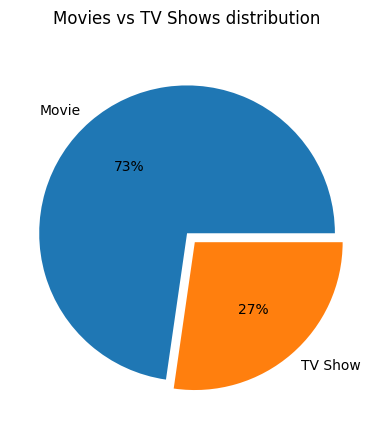

In [ ]:
#Labels = ['Movie','TV show']
plt.pie(df_new['type'].value_counts(),labels = df_new['type'].value_counts().index,
        explode=(0.08,0),autopct='%0.0f%%')

plt.suptitle('Movies vs TV Shows distribution')
plt.show()
#plt.savefig("1.png")

Bar Chart of Content across Countries

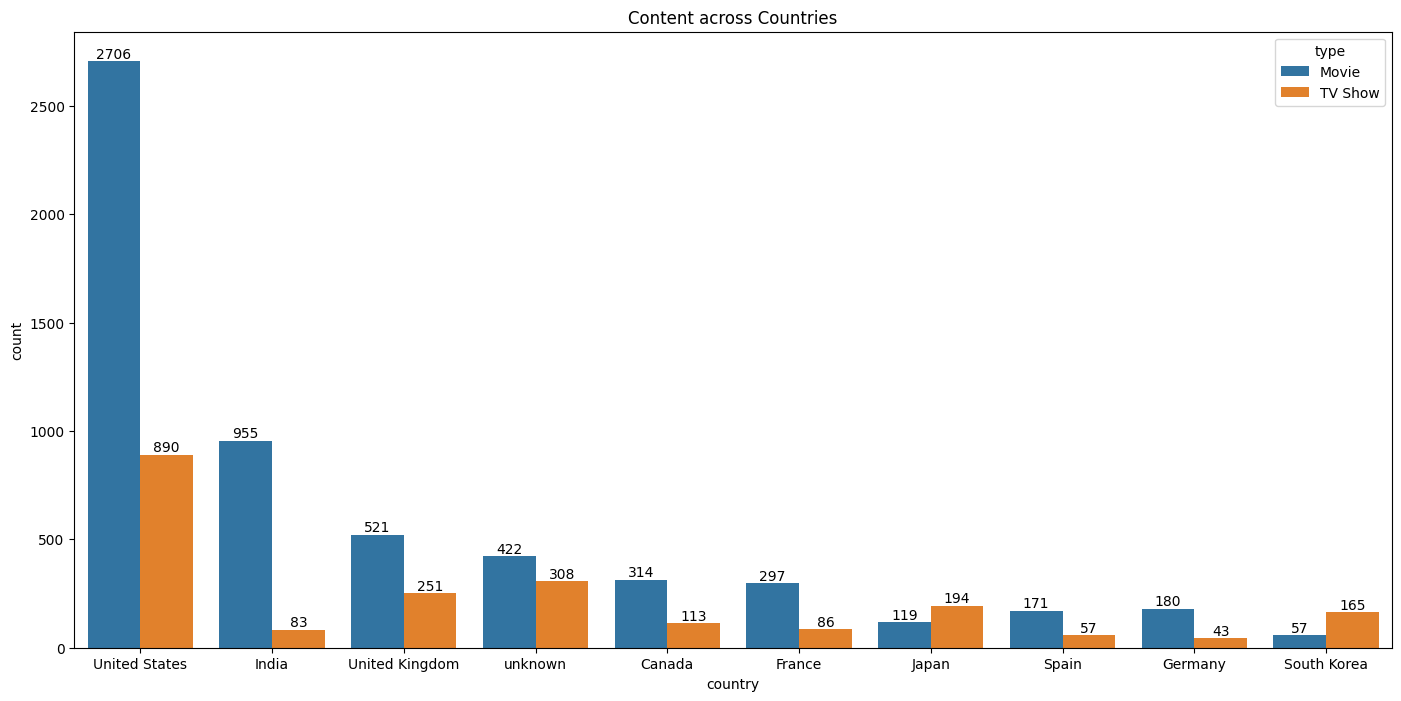

In [ ]:
df_temp = df_new.drop_duplicates(subset = ['country','title'])
x = df_temp['country'].value_counts().head(10)

plt.figure(figsize=(17,8))
plt.title('Content across Countries')
label=sns.countplot(data=df_temp, x ='country',hue='type',order=x.index)
for i in label.containers:
  label.bar_label(i)
plt.show()
#plt.savefig("2.jpg")

Bar Chart of Top 10 Directors of Movies and TV Shows

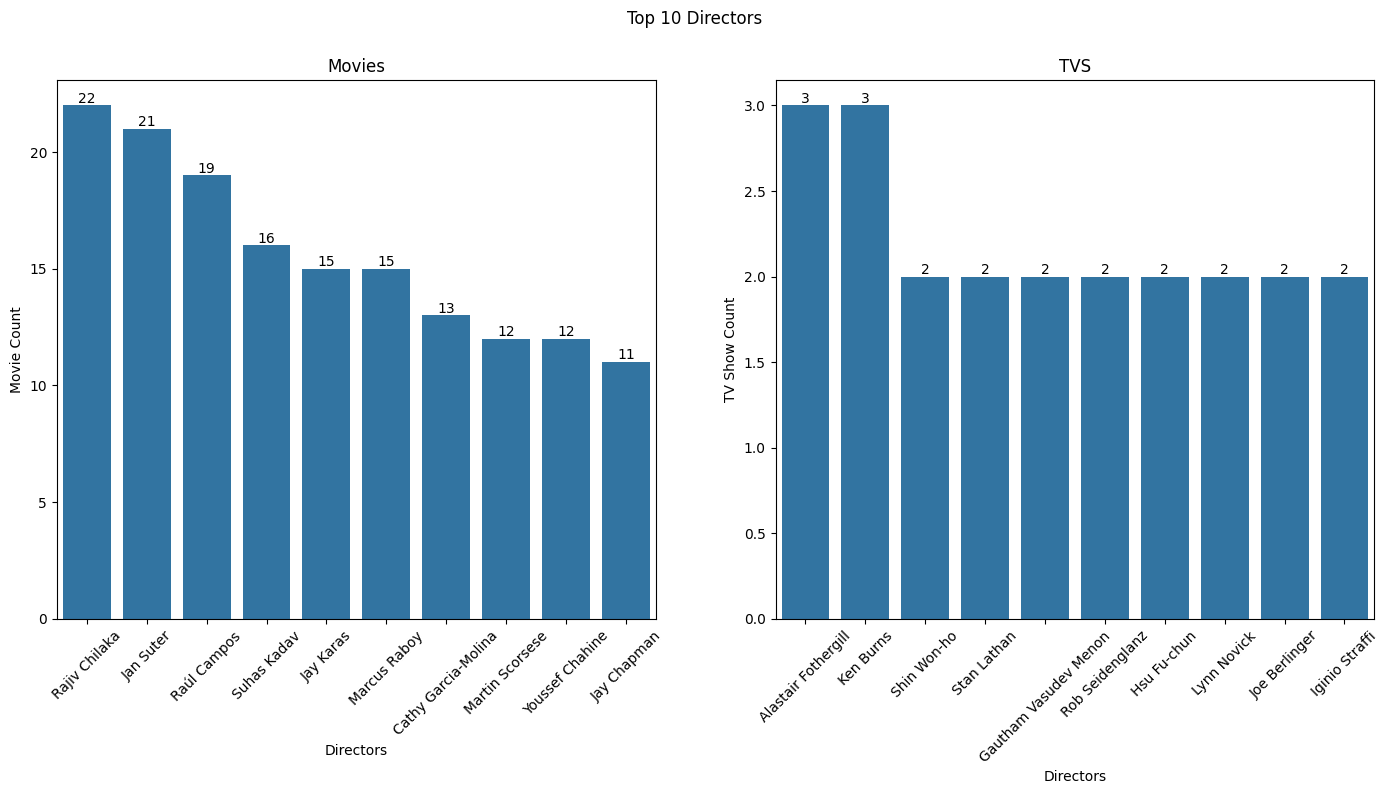

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset=['director','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset=['director','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Directors')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='director',
                      order=df_movies_temp['director'].value_counts()[1:11].index)
for i in label.containers:
  label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("Movie Count")

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='director',
                      order=df_tvs_temp['director'].value_counts()[1:11].index)
for i in label.containers:
  label.bar_label(i)
plt.title("TVS")
plt.xticks(rotation=45)
plt.xlabel("Directors")
plt.ylabel("TV Show Count")

plt.show()

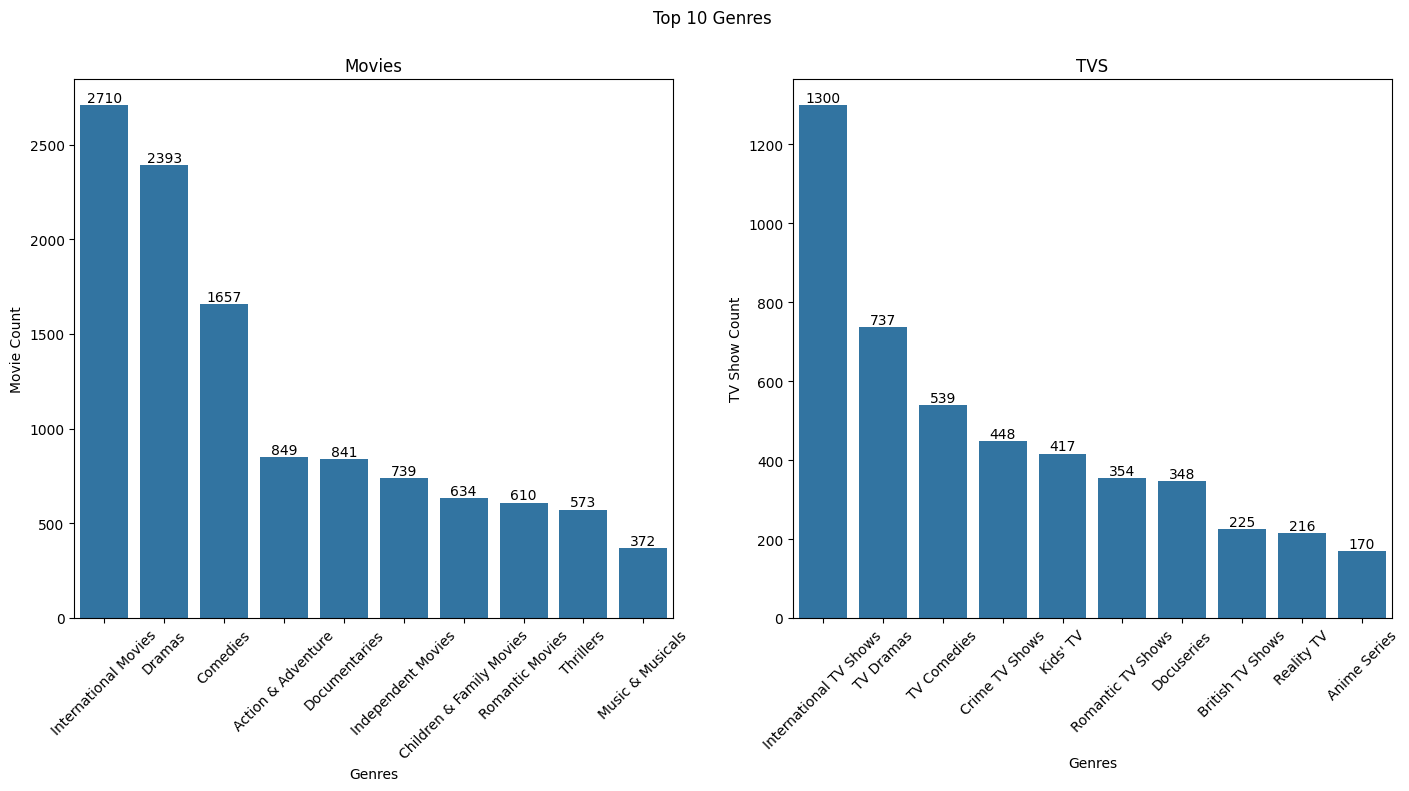

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset=['genre','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset=['genre','title'])

plt.figure(figsize=(17,7))
plt.suptitle('Top 10 Genres')

plt.subplot(1,2,1)
label = sns.countplot(data=df_movies_temp, x='genre',
                      order=df_movies_temp['genre'].value_counts().head(10).index)
for i in label.containers:
  label.bar_label(i)
plt.title("Movies")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("Movie Count")

plt.subplot(1,2,2)
label = sns.countplot(data=df_tvs_temp, x='genre',
                      order=df_tvs_temp['genre'].value_counts().head(10).index)
for i in label.containers:
  label.bar_label(i)
plt.title("TVS")
plt.xticks(rotation=45)
plt.xlabel("Genres")
plt.ylabel("TV Show Count")

plt.show()

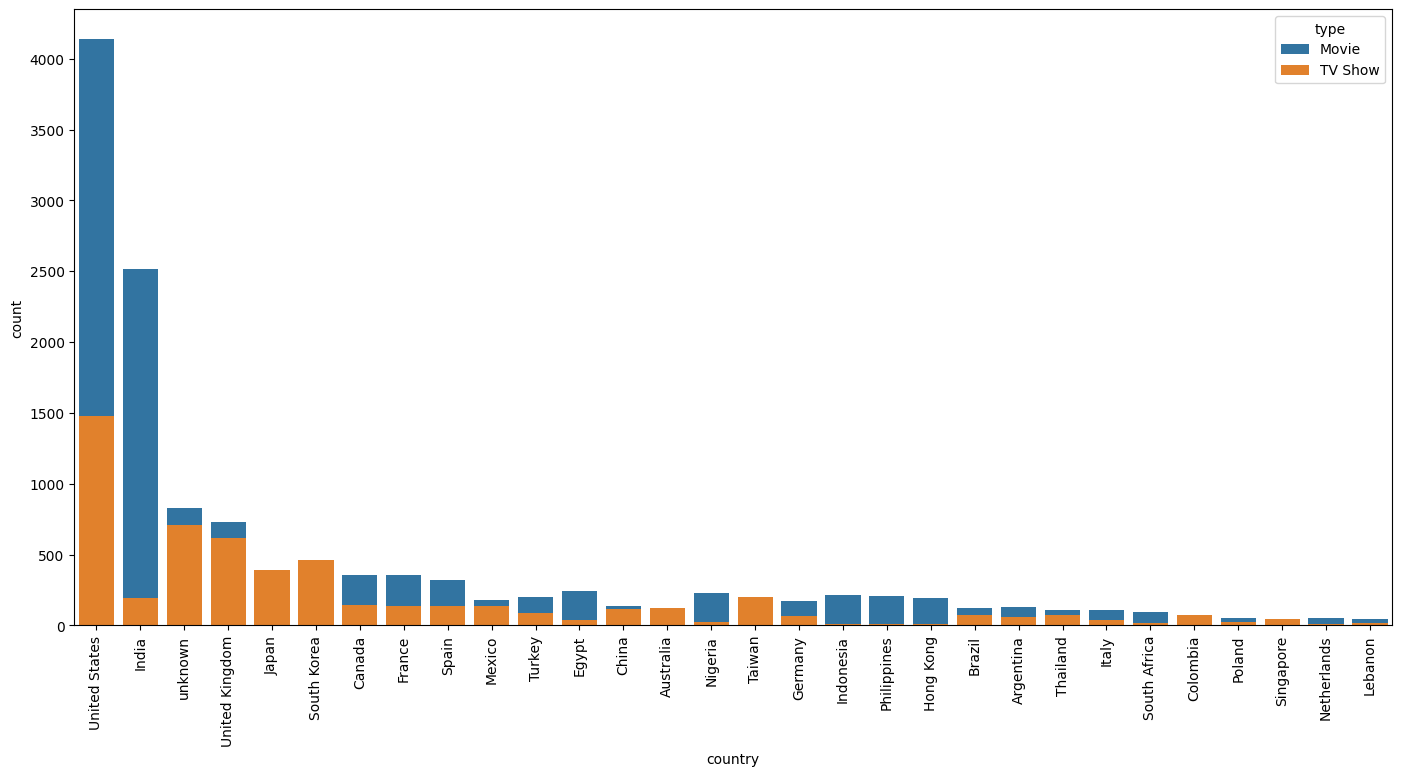

In [ ]:
# Stagged Graph

df_temp = df_new.drop_duplicates(subset=['genre','title'])

plt.figure(figsize = (17,8))
plt.xticks(rotation=90)
sns.countplot(data=df_temp, x='country', hue='type', dodge=False,
              order = df_temp['country'].value_counts().head(30).head(30).index)
plt.show()

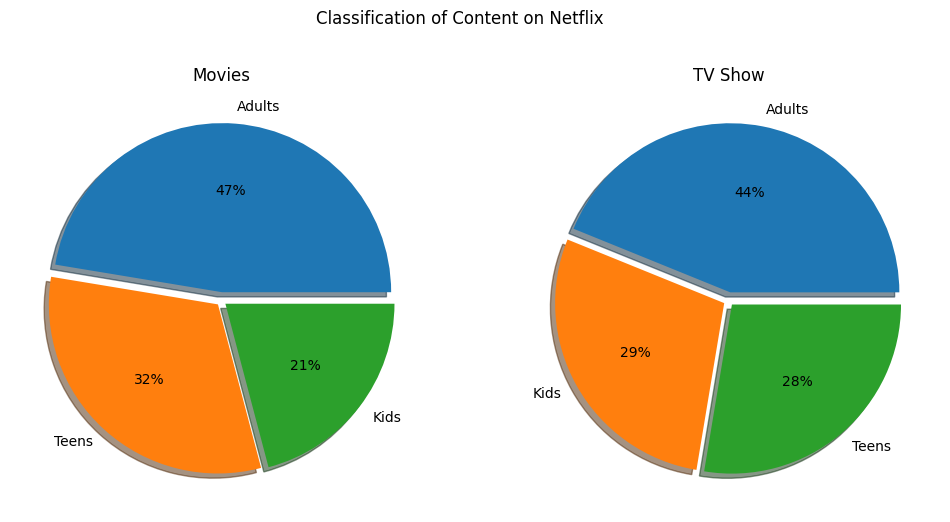

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['rating','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['rating','title'])

plt.figure(figsize = (12,6))
plt.suptitle('Classification of Content on Netflix')

plt.subplot(1,2,1)
plt.pie(df_movies_temp['rating'].value_counts(),labels = df_movies_temp['rating'].value_counts().index,
        autopct='%0.0f%%', explode = (0.05,0.03,0.03), shadow =True)
plt.title('Movies')

plt.subplot(1,2,2)
plt.pie(df_tvs_temp['rating'].value_counts(),labels = df_tvs_temp['rating'].value_counts().index,
        autopct='%0.0f%%', explode = (0.05,0.03,0.03), shadow =True)
plt.title('TV Show')

plt.show()

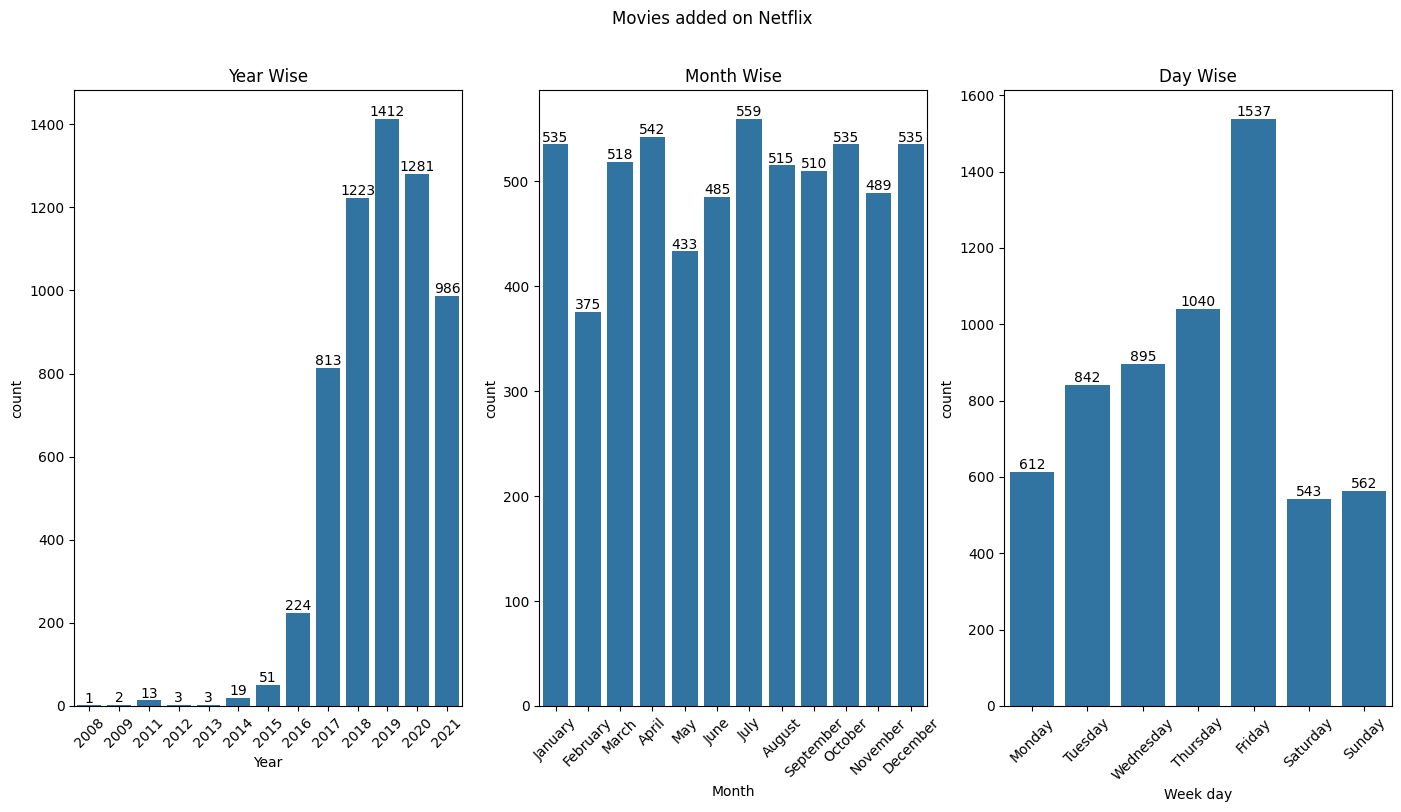

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['year','title'])

mv_year = df_movies_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month = df_movies_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_movies_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('Movies added on Netflix')


plt.subplot(1,3,1)
label = sns.countplot(data=df_movies_temp, x='year',order= mv_year.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year Wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_movies_temp, x='month_name',order= mv_month.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month Wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_movies_temp, x='weekday',order= mv_day.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Week day')
plt.title('Day Wise')

plt.show()




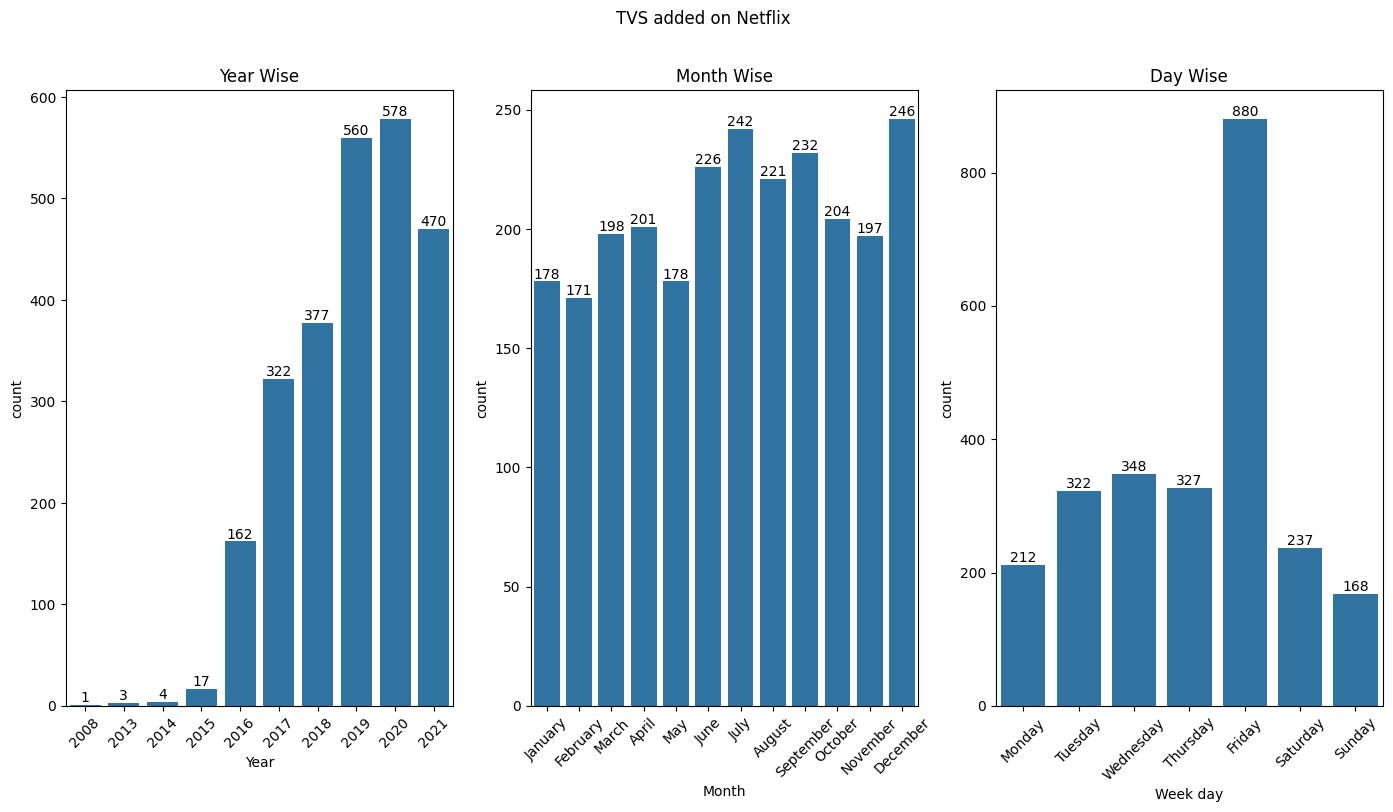

In [ ]:
dv_tvs_temp = df_tvs.drop_duplicates(subset = ['year','title'])

mv_year = df_tvs_temp['year'].value_counts()
mv_year.sort_index(inplace=True)

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
mv_month = df_tvs_temp['month_name'].value_counts().loc[month_order]

day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
mv_day = df_tvs_temp['weekday'].value_counts().loc[day_order]

plt.figure(figsize=(17,8))
plt.suptitle('TVS added on Netflix')


plt.subplot(1,3,1)
label = sns.countplot(data=df_tvs_temp, x='year',order= mv_year.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title('Year Wise')

plt.subplot(1,3,2)
label = sns.countplot(data=df_tvs_temp, x='month_name',order= mv_month.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.title('Month Wise')

plt.subplot(1,3,3)
label = sns.countplot(data=df_tvs_temp, x='weekday',order= mv_day.index,)
for i in label.containers:
    label.bar_label(i)
plt.xticks(rotation=45)
plt.xlabel('Week day')
plt.title('Day Wise')

plt.show()

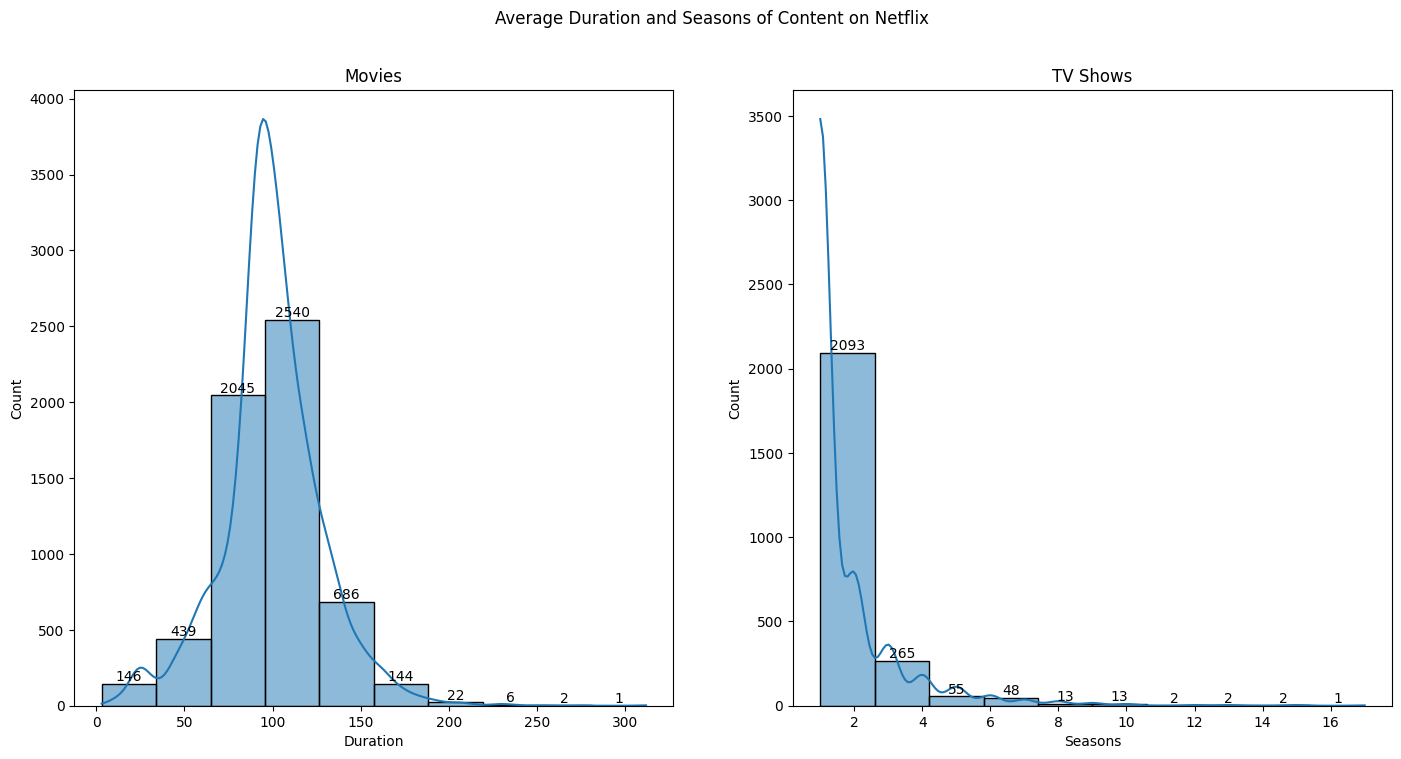

In [ ]:
df_movies_temp = df_movies.drop_duplicates(subset = ['duration','title'])
df_tvs_temp = df_tvs.drop_duplicates(subset = ['seasons','title'])

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.histplot(df_movies_temp['duration'].astype(int),bins=10,kde = True)
for i in label.containers:
  label.bar_label(i)
plt.xlabel('Duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.histplot(df_tvs_temp['seasons'].astype(int),bins=10,kde = True)
for i in label.containers:
  label.bar_label(i)
plt.xlabel('Seasons')
plt.title('TV Shows')

plt.show()

/tmp/ipython-input-565699980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
/tmp/ipython-input-565699980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)


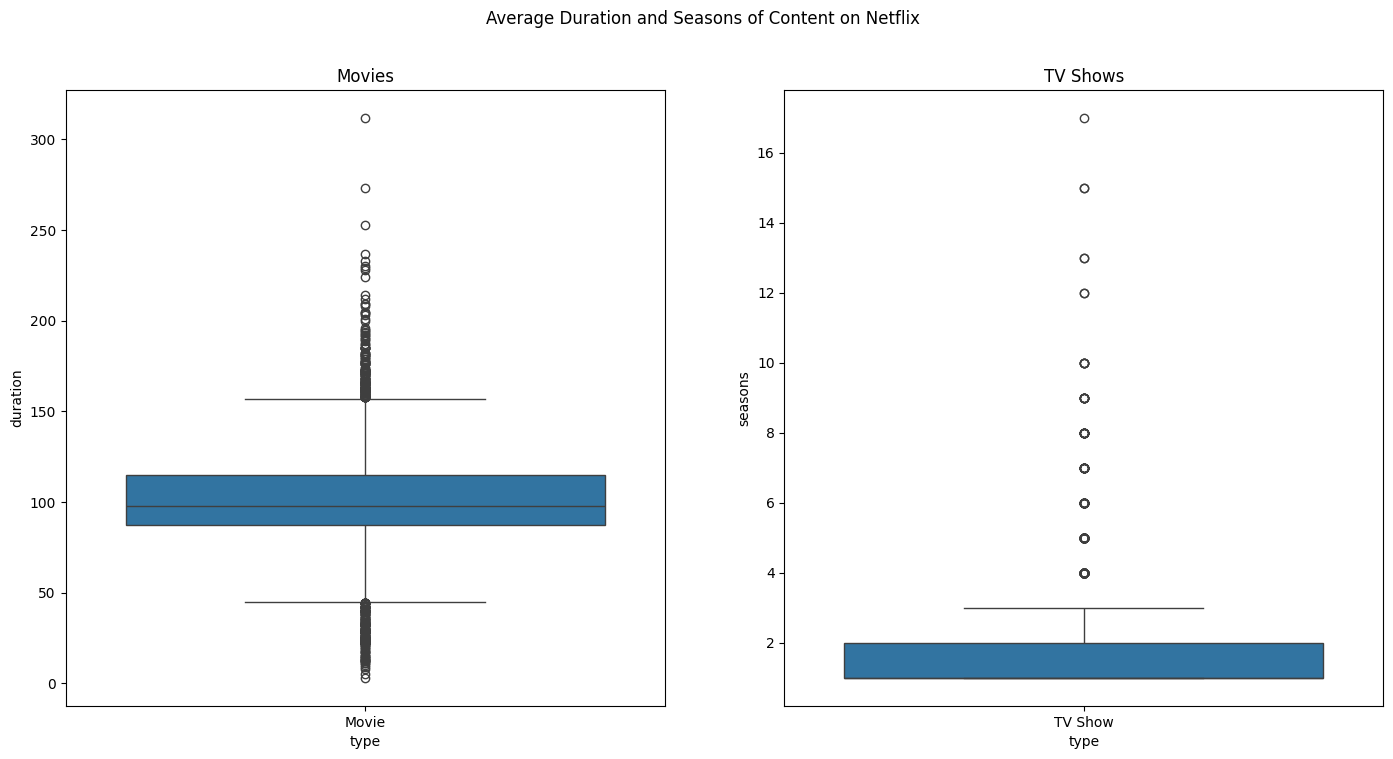

In [ ]:
df_movies_temp['duration'] = df_movies_temp['duration'].astype(int)
df_tvs_temp['seasons'] = df_tvs_temp['seasons'].astype(int)

plt.figure(figsize=(17,8))
plt.suptitle('Average Duration and Seasons of Content on Netflix')

plt.subplot(1,2,1)
label = sns.boxplot(df_movies_temp,x='type',y='duration')
plt.title('Movies')

plt.subplot(1,2,2)
label = sns.boxplot(df_tvs_temp,x='type',y='seasons')
plt.title('TV Shows')

plt.show()

In [ ]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'TV Show Genres Word Cloud')

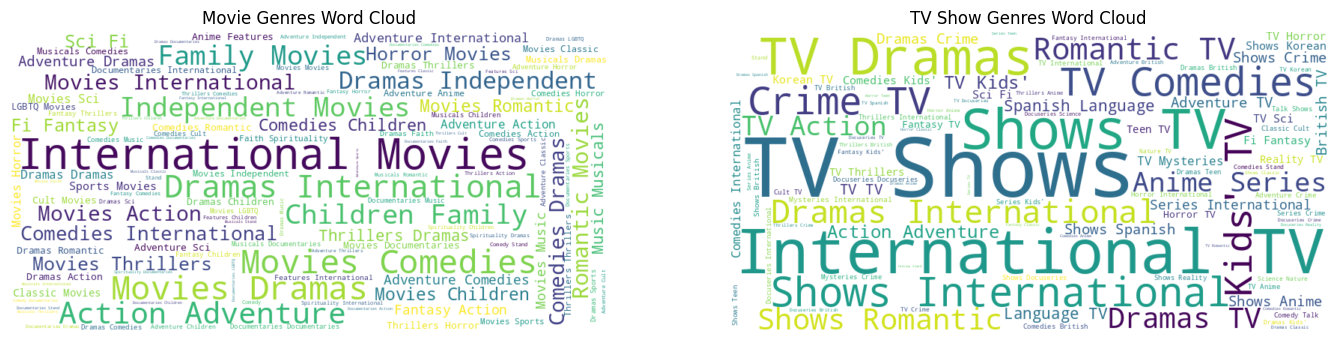

In [ ]:
genre_text = " ".join(df_movies["genre"])
wordcloud = WordCloud(width=800,height=400,background_color="white").generate(genre_text)

plt.figure(figsize=(17,10))

plt.subplot(1,2,1)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genres Word Cloud")

genre_text = " ".join(df_tvs["genre"])
wordcloud = WordCloud(width=800,height=400,background_color="white").generate(genre_text)

plt.subplot(1,2,2)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.title("TV Show Genres Word Cloud")